##### Here I am implementing a classification model for Telecom data.

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# reading dataset into a pandas dataframe
df=pd.read_csv('Churn-data.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
# checking datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Here the total charges column is shown as object type(string) so converting that to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges']=df['TotalCharges'].fillna(0)

In [8]:
# Converting all the column names to lower case and the columns having string values also to lower case and replace space with _

In [9]:
df.columns=df.columns.str.lower().str.replace(' ','_')
string_cols=list(df.dtypes[df.dtypes==object].index)

In [10]:
for i in string_cols:
    df[i]=df[i].str.lower().str.replace(' ','_')

In [11]:
# Converting the datatype of Churn vairable to integer
df.churn=(df.churn=='yes').astype(int)

In [12]:
# Checking the datatypes now
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


##### Dividing dataset into 3 sets: train,test and validation .I am using sklearn train_test_split fucction with a fixed random state by first using this on whole dataset and then again using on obtained dataset.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_T,y_test=train_test_split(df,test_size=0.20,random_state=1)
X_train,X_val=train_test_split(X_T,test_size=0.33,random_state=10)
y_train=X_train.churn.values
y_val=X_val.churn.values

In [15]:
# Removing churn variable from training dataset.
del X_train['churn']
del X_val['churn']

##### EDA

In [16]:
# Checking null values
X_T.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [17]:
# There are no null values thats a sign of releif.
# So now checking the distribution of churn
X_T.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [18]:
# There is a huge difference in 2 classes so its a case of imbalanced classification. Calculating churn rate as follows:
global_mean=X_T.churn.mean()
round(global_mean,2)

0.27

In [19]:
# As we are habing categorical as well as numerical values we need to separate them out for better analysis.
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 'multiplelines', 'internetservice',
'onlinesecurity', 'onlinebackup', 'deviceprotection','techsupport', 'streamingtv', 'streamingmovies','contract', 'paperlessbilling',
 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [20]:
# Checking the number of unique values in categorical features
X_T[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

##### Feature Selection
##### Firstly checking which categorical features are important

##### Churn Rate : Looking for churn rate for each variable.I'll calculate the group churn rate and compare it to global churn rate. The group here is the collection of values of a particular type in a variable. If the difference between the rates is small, the value is not important when predicting churn because this group of customers is not really different from the rest of the customers. On the other hand, if the difference is not small, I will consider that group and variable.

##### For example: Taking gender variable:

In [21]:
female_mean=X_T[X_T.gender == 'female'].churn.mean()
print('gender==female:',round(female_mean, 2))
male_mean=X_T[X_T.gender == 'male'].churn.mean()
print('gender==male:',round(male_mean, 2))

gender==female: 0.28
gender==male: 0.26


##### The difference between the means of males and females is quite small so it will not to a good option to consider gender as a variable while making predictions.
##### In addition to looking at the difference between the group rate and the global rate,I'll look at the ratio between them. This ration is known as risk ratio , where risk refers to the risk of having the effect of churning

In [22]:
# Implementing thr risk ratio for all categorical variables:
from IPython.display import display
for i in categorical:
    df_=X_T.groupby(by=i).churn.agg(['mean'])
    df_['difference']=df_['mean']-global_mean
    df_['risk_ratio']=df_['mean']/global_mean
    display(df_)

,mean,difference,risk_ratio
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,difference,risk_ratio
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,difference,risk_ratio
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,difference,risk_ratio
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,difference,risk_ratio
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,difference,risk_ratio
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,difference,risk_ratio
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,difference,risk_ratio
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,difference,risk_ratio
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,difference,risk_ratio
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,difference,risk_ratio
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,difference,risk_ratio
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,difference,risk_ratio
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,difference,risk_ratio
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,difference,risk_ratio
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,difference,risk_ratio
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


##### By looking at the differences and the risks, I can identify the most informative features: the features that are helpful for detecting churn.it’s hard to use them to say what the most important feature is so I am using mutual information metric from sklearn which can measure the degree of dependency between a categorical variable and the target variable.if the mutual information between a categorical variable and the target is high, this categorical variable is useful for predicting the target. On the other hand, if the mutual information is low, the categorical variable and the target are independent,so the variable will not be useful for predictions.

In [23]:
from sklearn.metrics import mutual_info_score
def calculate_mut_info(a):
    return mutual_info_score(a,X_T.churn)
df_mi=X_T[categorical].apply(calculate_mut_info)
df_mi=df_mi.sort_values().to_frame(name='Mutual Info')
display(df_mi)

,Mutual Info
gender,0.000117
phoneservice,0.000229
multiplelines,0.000857
seniorcitizen,0.009410
partner,0.009968
dependents,0.012346
paperlessbilling,0.017589
streamingmovies,0.031581
streamingtv,0.031853
paymentmethod,0.043210


##### contract, onlinesecurity, and techsupport are among the most important features.Gender and phone service are least important so I will not use them for training model.

##### Feature Selection for numerical variables:

##### Mutual info can't be used between numerical variable and binary target variable so using Pearson correlation coefficient.

In [24]:
X_T[numerical].corrwith(X_T.churn).to_frame('P_correlation')

,P_correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [25]:
X_T.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


##### Feature Engineering: The features which I will use need to be converted to numbers as Machine learning algorithms don't understand any other types of values so I will use One Hot encoding to convert categorical values to numerical and I am using DictVectoizer for this.

In [26]:
# importing and making an object
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse=False)

In [27]:
train_dic=X_train[numerical+categorical].to_dict(orient='records')
dv.fit(train_dic)

DictVectorizer(sparse=False)

##### The to_dict has an important parameter orient that can has multiple values but I chose records here which is list like and has format as : {['column'->value],['column'->value],['column'->value].....}

In [28]:
X_train_dict=dv.transform(train_dic)

In [29]:
X_train_dict.shape

(3774, 45)

##### Logistic Regression Model Training:

In [30]:
# importing from sklearn
from sklearn.linear_model import LogisticRegression

In [31]:
model=LogisticRegression()
model.fit(X_train_dict,y_train)

C:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Measure performance using validation set
val_dict=X_val[categorical + numerical].to_dict(orient='records')
X_val_dict=dv.transform(val_dict)

In [33]:
model.predict_proba(X_val_dict)

array([[0.98209632, 0.01790368],
       [0.97494926, 0.02505074],
       [0.35715346, 0.64284654],
       ...,
       [0.95307822, 0.04692178],
       [0.76631927, 0.23368073],
       [0.88231667, 0.11768333]])

##### The first column above shows that there is no churn and second shows there is churn so selecting second column only.

In [34]:
y_pred=model.predict_proba(X_val_dict)[:, 1]
y_pred

array([0.01790368, 0.02505074, 0.64284654, ..., 0.04692178, 0.23368073,
       0.11768333])

##### These are the soft predictions sthat a customer will churn so I will convert them into actual true and false predictions by using a thershold value of 0.5 which is generally taken.

In [35]:
churn=y_pred>0.5

I am using accuracy for measuring model performance : calculate the number of times the predictions match the actual value, I will use it for measuring the quality of the model.This quality measure is called accuracy.

In [36]:
(y_val==churn).mean()

0.7876344086021505

##### Although I used accuracy as a measure to evaluate the performance of model there are many more metrics also and 78.76% accuracy is good without performing much things. Maybe selecting some of features may increase accuracy and performance.

##### I will also evaluate model with different threshold values to find out if accuracy increases.

In [37]:
# Using sklearn accuracy_score
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 11)
for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.275
0.10 0.605
0.20 0.705
0.30 0.748
0.40 0.768
0.50 0.788
0.60 0.784
0.70 0.760
0.80 0.729
0.90 0.725
1.00 0.725


Its not going beyond 78.8 which I obtained by randomly choosing threshold value to be 0.5

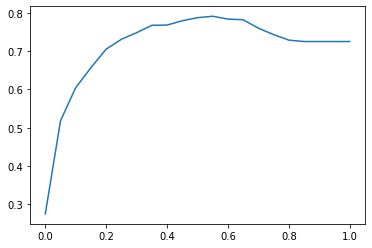

In [38]:
# plotting the accuracy
thresholds=np.linspace(0, 1, 21)
accuracies=[]
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
plt.plot(thresholds, accuracies)

##### Here the dataset is imbalanced as the number of customers who did not churned is much larger than who churned so it will not be a good idea to use Accuracy score here so I will be using Confusion Matrix and other related things.

In [41]:
# making the confusion matrix
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()
conf_matrix = np.array(
    [[true_negative, false_positive], 
     [false_negative, true_positive]]) 
conf_matrix

array([[1186,  163],
       [ 232,  279]])

In [42]:
# calculating percentage
conf_matrix/conf_matrix.sum()

array([[0.63763441, 0.08763441],
       [0.12473118, 0.15      ]])

##### True positive and True Negative are good values here positive means churn and negative means no churn. False Positve and False negative are bad values as we made wrong predictions.

##### Calculating Precision & Recall: The precision of a model tells us how many of the positive predictions turned out to be correct.
##### P=TP / (TP + FP)      
##### Recall is the fraction of correctly classified positive examples among all positive examples.
##### R=TP / (TP + FN)

In [43]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.6312217194570136, 0.5459882583170255)